# MBA Admissions Prediction - SEMMA Methodology


This notebook demonstrates the application of the SEMMA methodology to predict MBA admissions outcomes.
We will cover the following steps:

1. **Sample**: Extracting a sample from the dataset.
2. **Explore**: Exploratory data analysis (EDA) to understand the data.
3. **Modify**: Data cleaning, preprocessing, and feature engineering.
4. **Model**: Building and optimizing classification models.
5. **Assess**: Evaluating the model's performance and drawing conclusions.


## Step 1: Sample

In [1]:

import pandas as pd

# Load the dataset
mba_data = pd.read_csv('MBA.csv')

# Sample the dataset
sample_size = 1000
mba_sample = mba_data.sample(n=sample_size, random_state=42).reset_index(drop=True)

# Display the sample
mba_sample.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,4371,Male,False,3.48,Humanities,White,630.0,5.0,Nonprofit/Gov,NaN
1,3471,Male,False,3.27,Business,White,610.0,6.0,PE/VC,NaN
2,4954,Male,False,3.31,STEM,Asian,670.0,6.0,Nonprofit/Gov,NaN
3,997,Male,True,3.29,Humanities,NaN,660.0,5.0,PE/VC,NaN
4,2765,Male,True,3.02,STEM,NaN,570.0,3.0,PE/VC,NaN


## Step 2: Explore

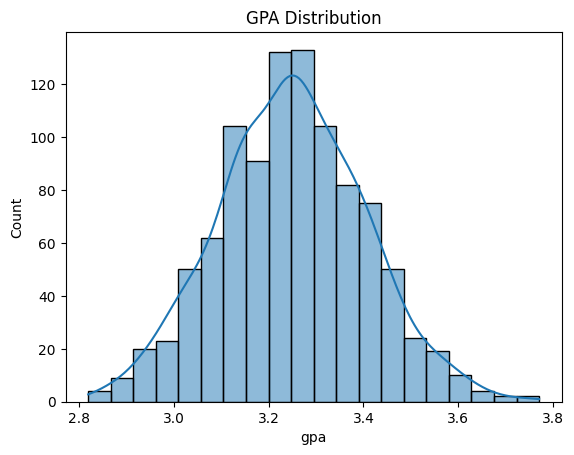

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,300
gmat,0
work_exp,0
work_industry,0
admission,830


In [2]:

# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot GPA distribution
sns.histplot(mba_sample['gpa'], bins=20, kde=True)
plt.title('GPA Distribution')
plt.show()

# Check for missing values
mba_sample.isnull().sum()


## Step 3: Modify (Data Cleaning and Preprocessing)

In [5]:

# Handle missing values
mba_sample['race'].fillna('Unknown', inplace=True)
mba_sample['admission'].fillna('Denied', inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    mba_sample[col] = le.fit_transform(mba_sample[col])
    label_encoders[col] = le  # Save the encoders for inverse transformation if needed

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mba_sample[['gpa', 'gmat', 'work_exp']] = scaler.fit_transform(mba_sample[['gpa', 'gmat', 'work_exp']])

# Display the cleaned dataset
mba_sample.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,4371,1,0,1.496889,1,5,-0.425525,0.026026,8,1
1,3471,1,0,0.137199,0,5,-0.832531,0.989942,10,1
2,4954,1,0,0.396188,2,0,0.388487,0.989942,8,1
3,997,1,1,0.266693,1,4,0.184984,0.026026,10,1
4,2765,1,1,-1.481479,2,4,-1.646543,-1.901806,10,1


## Step 4: Model (Building and Evaluating Models)

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features and target
X = mba_sample.drop(columns=['application_id', 'admission'])
y = mba_sample['admission']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.25      0.33        32
           1       0.85      0.95      0.90       164
           2       0.00      0.00      0.00         4

    accuracy                           0.82       200
   macro avg       0.45      0.40      0.41       200
weighted avg       0.78      0.82      0.79       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 5: Model Optimization (Hyperparameter Tuning)

In [7]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=200, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters and best score
grid_search.best_params_, grid_search.best_score_


({'C': 0.1, 'solver': 'lbfgs'}, 0.8362499999999999)

## Step 6: Assess (Final Model Evaluation)

In [8]:

# Evaluate the optimized model on the test set
final_model = LogisticRegression(C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver'], random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Display final evaluation
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.58      0.22      0.32        32
           1       0.85      0.97      0.90       164
           2       0.00      0.00      0.00         4

    accuracy                           0.83       200
   macro avg       0.48      0.40      0.41       200
weighted avg       0.79      0.83      0.79       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
